In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [100]:
df = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
df = df.drop(['id','name','host_name','last_review','reviews_per_month','neighbourhood','host_id'], axis=1)
df=pd.get_dummies(df)

In [101]:

X = df.drop('price', axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)


In [102]:
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training RMSE: ", np.sqrt(mse_train))
print("Testing RMSE: ", np.sqrt(mse_test))

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)
print('train_score',train_score_lr)
print('test_score',test_score_lr)
#the training MSE and R-squared values are much better than the testing values, the model is likely overfitting

Training RMSE:  214.08653454183846
Testing RMSE:  252.03564007924012
train_score 0.10793175416491141
test_score 0.08395212651231476


In [86]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]=scaler.fit_transform(df[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)

#from sklearn.linear_model import LassoCV
#lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#y_train_pred = lasso_cv.predict(X_train)
#y_test_pred = lasso_cv.predict(X_test)
#mse_train = mean_squared_error(y_train, y_train_pred)
#mse_test = mean_squared_error(y_test, y_test_pred)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))
train_score_ls =lasso_cv.score(X_train,y_train)
test_score_ls =lasso_cv.score(X_test,y_test)
print('train_score',train_score_ls)
print('test_score',test_score_ls)
print("Lasso coefficients:", lasso_cv.coef_)
non_zero_indices = np.nonzero(lasso_cv.coef_)[0]
selected_features = X_train.columns[non_zero_indices]
print("Selected features:", selected_features)




214.08653458670545
252.035654332221
train_score 0.1079317537910024
test_score 0.08395202290464099
Lasso coefficients: [-1.69005621e+02 -5.41396340e+02 -1.48794017e-01 -3.00482529e-01
 -1.56388786e-01  2.02486286e-01 -8.97187483e+00 -3.94773187e+01
  1.60145776e+01 -1.22488286e+01 -1.53025961e+02  1.08182942e+02
  2.78148689e+00 -3.33353522e+01]
Selected features: Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.736e+07, tolerance: 1.633e+05
  model = cd_fast.enet_coordinate_descent(


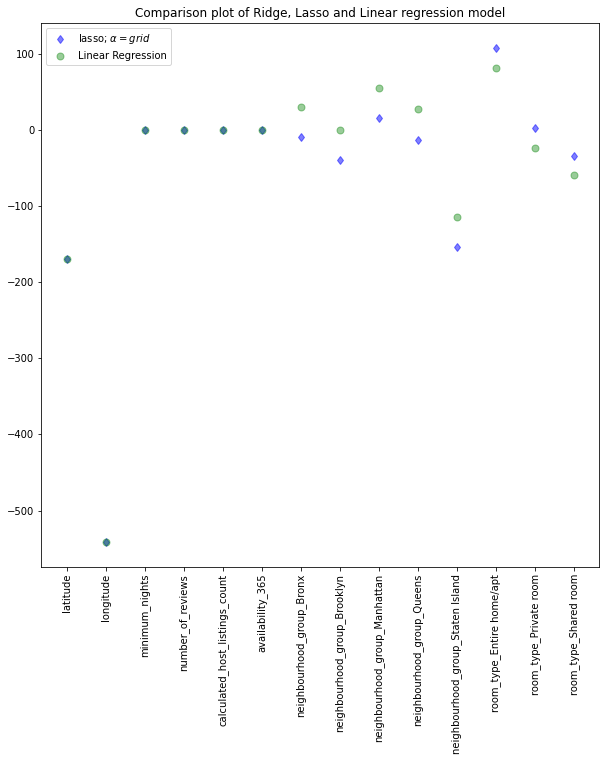

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
df[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]=scaler.fit_transform(df[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)

In [77]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
28275,40.79748,-73.94800,18,1,1,0,0,0,1,0,0,0,1,0
2533,40.72805,-73.99871,2,2,1,0,0,0,1,0,0,1,0,0
45324,40.62281,-73.93446,1,3,1,87,0,1,0,0,0,0,1,0
41774,40.80134,-73.96897,1,19,1,65,0,0,1,0,0,1,0,0
24595,40.68633,-73.97164,2,15,1,4,0,1,0,0,0,1,0,0


In [89]:
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance
np.array(X_train.columns)[importance > 0]
np.array(X_train.columns)[importance == 0]

array(['neighbourhood_group_Queens', 'room_type_Private room'],
      dtype=object)

In [99]:

y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

ValueError: ignored

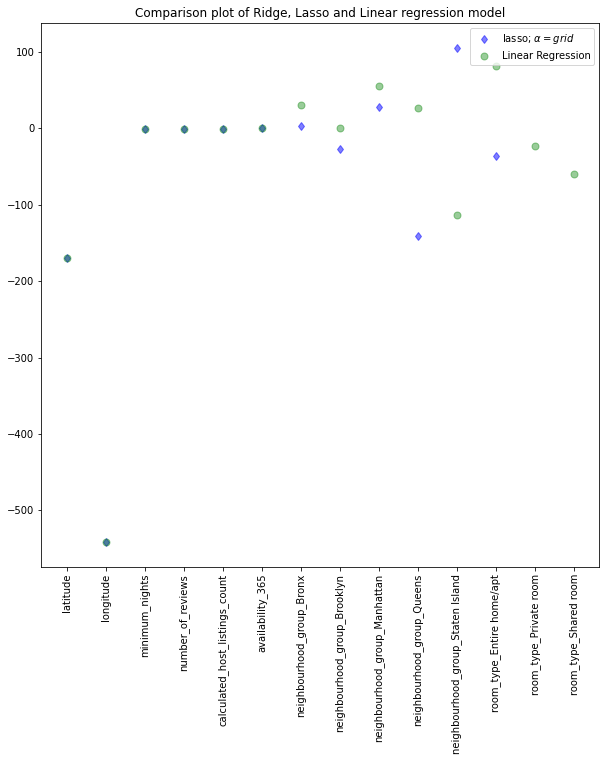

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()